<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_TF_Day_2_MNIST_Eager_ConvNet_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![TF](https://1.bp.blogspot.com/-eb-_3Aqu5bA/XnertoOpPgI/AAAAAAAAa6Y/8TPaJ8vjn2cN_so7xLeqPZDqX3pQjVARgCLcBGAsYHQ/s200/tf.jpg)

# Exploring the New Eager Execution TensorFlow API

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
plt.rcParams["axes.grid"] = False

Using TensorFlow backend.


# Deep Learning

Deep Learning is a branch of machine learning focused on building algorithms that learn data representations (instead of task-specific solutions) 

Deep Learning is **state-of-the-art** in almost all **perception** problem: 

- Natural Language Processing (NLP)
- Voice Recognition
- Computer Vision

![alt text](https://developer.nvidia.com/sites/default/files/Deep_Learning_Icons_R5_PNG.jpg.png)

Deep Learning is a **family of methods**:
- Feedforward Network
- Convolutional Nets
- Recurrent Nets
- Auto-Encoders
- Generative Adversarial Networks
- etc...

# TensorFlow Eager Execution

Eager execution is a new **high-level TF API** that lets users execute tensors in real time (**Imperative**) fashion. 

- Brings TF to the level of some other Deep Learning frameworks like PyTorch and Chainer.
- Run TF models just like any other python code (Numpy and python objects compliant)
- Don't think about Computational Graphs - Just execute code normally 
- Allows for **real-time python** Debugging
- To enable Eager Execution - just run: **tf.enable_eager_execution()**

## Exercise

1- Enable eager execution mode using *tf.enable_eager_execution()*.

In [0]:
# Enable eager execution mode
tfe = tf.contrib.eager

## YOUR CODE GOES HERE
tf.enable_eager_execution()

In [0]:
if tf.executing_eagerly():
    print("Eager is Enabled!")

Eager is Enabled!


# Computer Vision 101 with MNIST 

## Exploring the MNIST dataset

Computer Vision is a branch of AI devoted to building algorithms that enable machines to perceive the world. 

MNIST is a computer vision dataset. 

It contains **greyscale images of handwritten digits** like these.

The MNIST dataset is composed of **60000 thousand images**. *50000* for training and *10000* for testing.

![alt text](https://www.tensorflow.org/versions/r1.1/images/MNIST-Matrix.png)

## Numerical Stabilization

Any time we are up to doing some calculus on a computer, we need to think about representation.
- We all know, machines are **memory-limited**

## Exercise

Accessing numerical error.
1. Create two variables a and b.
2. Assign 1000000000 (one billion) to a and 0.000001 to be
3. In the loop add b to a 1000000 (one million) times

What happens? What should the result be?

In [0]:
a = 1000000000 # one billion
b = 0.000001
for i in range(1000000):
  a += b

print("a:", a)
print("a - 1000000000:", a - 1000000000)
print("Error:", 1 - (a - 1000000000))

a: 1000000000.9536743
a - 1000000000: 0.95367431640625
Error: 0.04632568359375


Try now to substitute the 1000000000 (one billion) to just one.

What do you see? 

When calculating the grandients and the loss, we do NOT want their values to get too **BIG** or too **SMALL**.
- **Facilitates the job of the optimizer** (find the best spot in the error function)
- Makes convergence FASTER and reduces the probability of **DIVERGENCE**.

**That is why normalization is important.**

## Load MNIST data

In [0]:
# Download the mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Exercise

Like we did before, divide the training data into **train** and **validation** sets.

- You may use: [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Choose a reasonable value for the split fraction.

In [0]:
## YOUR CODE GOES HERE
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Visualize the dataset Shapes

In [0]:
print("Train shape:", X_train.shape)
print("Train labels:", y_train.shape)
print("Validation shape:", X_val.shape)
print("Validation labels:", y_val.shape)
print("Test shape:", X_test.shape)
print("Test labels:", y_test.shape)

Train shape: (54000, 28, 28)
Train labels: (54000,)
Validation shape: (6000, 28, 28)
Validation labels: (6000,)
Test shape: (10000, 28, 28)
Test labels: (10000,)


## Exercise

Build the **normalizer()** function above. 

Our goal is to keep the input values (pixels) in a small range.

1. Option 1: Dvide the image pixels by 255. What does it mean?
2. Option 2: Subtract each pixel by 128 and divide by 128. 

In [0]:
def normalizer(image, label):
  """
  TODO: Finish the normalizer function
  """
  return 2 * tf.to_float(image) / 255. - 1.0, label

Train: [5299. 6088. 5386. 5542. 5262. 4870. 5338. 5632. 5266. 5317.]
Test: [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


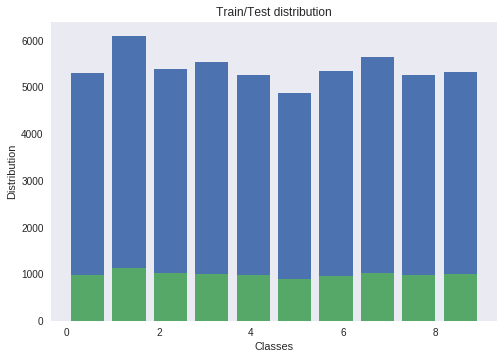

In [0]:
## Visualize the dataset distribution
import pylab as P
n, bins, patches = P.hist(y_train, bins=10, histtype="bar", rwidth=0.8)
print("Train:", n)
n, bins, patches = P.hist(y_test, bins=10, histtype="bar", rwidth=0.8 )
print("Test:", n)
P.xlabel('Classes')
P.ylabel('Distribution')
P.title('Train/Test distribution')
P.show()

In [0]:
print("Max value:", np.max(X_train[0]))
print("Min value:", np.min(X_train[0]))
print("Mean:", np.mean(X_train[0]))
print("Std:", np.std(X_train[0]))

Max value: 255
Min value: 0
Mean: 11.565051020408163
Std: 45.77647391710191


## Visualize some MNIST images

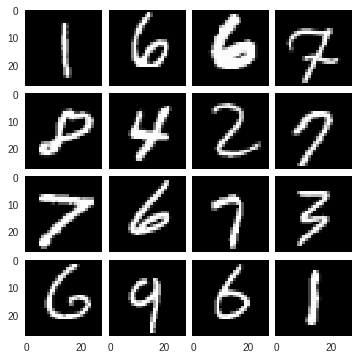

In [0]:
fig = plt.figure(1, (6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(16):
    grid[i].imshow(X_train[i], cmap="gray")  # The AxesGrid object work as a list of axes.

plt.show()

## Building our Neural Net


![alt text](http://cs231n.github.io/assets/cnn/convnet.jpeg)

The basic architecture follows a simple sequence of operations.
1. Convolution
2. Activation function
3. Pooling
4. Fully-Connected layers 

In the end, to build the classification layer, we usually use a fully-connected layer.

Refer to these links for full documentations:

- [Keras Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Keras Activation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)
- [Keras MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- [Keras Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)


![LeNet-5](https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png)


## Convolutions and Non-linearity

The convolution is a linear operation that uses **small local receptive fields** that pass over an image to create feature maps between the input and the next layer. 

Its main advantage is that we do not need to engineer the features (filter).
- The network will learn them for us.

Also, Convolution are very memory efficient.
- They **share parameters** across space.

![Convolution](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

Non-linearity is what makes DNN cool.

ReLU (rectified linear Unit) is one of the most simple functions one can think of.
- Yet, they do just what we need. **Non-linearity** and **Differentiability**.

![NonLinearity](https://tiny.colaflycdn.com/static/img/learn/relu.png)

## Exercise:

Build your own DNN using eager execution.

Hint: Use the [Keras layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) built into Tensorflow.

Convolutional Net template:






In [0]:
# def ConvNet():
#   Conv()
#   Pooling()
#   Conv()
#   Pooling()
#   ...
#   Flatten()
#   Dense()
#   Dense()
#   ...
#   Classification layer - Dense()

*tf.keras.layers.Conv2D(filters, kernel_size, strides, padding, activation=tf.nn.relu, use_bias)*
- filters: Number of convolutional filters. Can be 16, 32, 48 .
- kernel_size: The size of the filter. Usually 3, or 5.
- strides: Number of pixels that the filter should skip. Usually 1 or 2 (if 2, the output will have a smaller size).
- padding: One of 'same' or 'valid'. Valid padding means no padding.


*tf.keras.layers.MaxPool2D(pool_size, strides=2, padding='same')*
- Used to reduce the features spatial dimensions.

- pool_size: Size of the pooling window. Usually, 2
- strides: Go with 2.
- padding: Go with 'same'. We want to reduce the feature vectors dimensions!

*tf.keras.layers.Dense(units=128, activation=tf.nn.relu)*

- units: Number of neuron units: 96, 128, 256, 512 ...

Build a last Dense layer and set the *units* to have the **number of classes** of the dataset and **no Activation Function**.

In [0]:
class MNISTModel(tf.keras.Model):
    
    def __init__(self):
        super(MNISTModel, self).__init__() # Call the super class constructor
        
        # Now define the layers of your model
        # The convolutions, ReLUs and classifications layers goes here
        # CODE GOES HERE
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1),
                                            padding='same', activation=tf.nn.relu, use_bias=True)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same")
        self.flatten = tf.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.logits = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        # Use the layers defined in the constructor
        # Here, we define the model hierarchical computations
        # Start by passing the inputs to the first Conv layer and chain the results to the next layers
        # CODE GOES GERE
        conv1 = self.conv1(inputs)
        pool1 = self.pool1(conv1)
        flat = self.flatten(pool1)
        fc1 = self.fc1(flat)
        logits = self.logits(fc1)
        return logits

# Loss

The loss function (or objective) is responsible for measuring how **good/bad** our classifier is doing. 

There are many loss functions.

For **multiclass problems**, we usually use the **cross-entropy** function.

The cross-entropy loss (log-loss) is used to measure the performance of a classifier that outputs probabilities.

![alt text](https://github.com/sthalles/tensorflow-tutorials/blob/master/images/cross_entropy.png?raw=true)

- The cross-entropy **increases** when the predicted value deviates from the true values and **decreases** otherwise.

One-hot encoding is a form of representing categorical data so that each category (class) contains the same power (magnitude) over one another.

![One-hot encodding representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRo9fhLj8UpmziNvD_eifQ3SkjybaaGmlfLd5Z2fsDn3XaASUoWw)

### Exercise:

Finish the **loss()** function bellow.

1. Remember, our labels are vectors. *Example: [0, 3, 2, 5, 6, ..., 5]*. 

2. Each number represents the image corresponding class. However, in order to make the labels equally valued, we need to convert them to binary representations (**one-hot-encoding**).

3. Use the [tf.one_hot()](https://www.tensorflow.org/api_docs/python/tf/one_hot) function to convert the labels to the proper format.

4. For the cross-entropy loss you can choose to **write it your self** or use the built-in [tf.nn.softmax_cross_entropy_with_logits_v2()](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2). 

  - If you take the challenge of writing it, [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply) and [tf.log()](https://www.tensorflow.org/api_docs/python/tf/log) will help. 

In [0]:
def loss(logits, labels):
  # YOUR CODE GOES HERE
  labels_one_hot = tf.one_hot(labels, 10)
  
  # cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels_one_hot, logits=logits)
  # print(cross_entropy.shape)

  cross_entropy = tf.multiply(labels_one_hot, tf.log(tf.nn.softmax(logits))) # element wise multiplication
  return - tf.reduce_mean(cross_entropy)

## Exercise - Hyperparameters


Tune the hyperparameters bellow.
- Remember: The learning rate controls how fast your model learns. 
- A bigger learning rate might get you to a sub-optimal objective faster, but you might **overshoot the target.**

In [0]:
## CODE GOES HERE
epochs = 1
batch_size = 32
learning_rate = 0.001

# Optimizers

The Optimizer is the algorithm responsible for applying the gradients to the Model's weight variables. 

Imagine a curved surface (just an example), the goal is to find the minimal value of that surface. 

The Gradient points to the direction of **steepest ascent**. Thus, we follow the opposite direction of the gradient (**steepest descent**).

These are some of the Optimizers available in Tensorflow

- **AdadeltaOptimizer**: Optimizer that implements the Adadelta algorithm.

- **AdagradOptimizer**: Optimizer that implements the Adagrad algorithm.

- **AdamOptimizer**: Optimizer that implements the Adam algorithm.

- **GradientDescentOptimizer**: Optimizer that implements the gradient descent algorithm.

- **MomentumOptimizer**: Optimizer that implements the Momentum algorithm.

[Tensorflow Build-in Optimizers](https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/train)

## Exercise:

1. Pick one of these optimizers and  use it to minimize the loss function for your model.


![alt text](https://cs231n.github.io/assets/nn3/opt1.gif)

In [0]:
# Choose one of the optimizers and set an initial learning rate
# CODE GOES HERE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [0]:
# Create the model
model = MNISTModel()

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.map(normalizer)
dataset = dataset.shuffle(1000) # shuffle before each epoch and bufferize some data
dataset = dataset.repeat(epochs) # number of epochs
dataset = dataset.batch(batch_size) # batch size

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.map(normalizer)
val_dataset = val_dataset.repeat(1) # number of epochs
val_dataset = val_dataset.batch(128) # batch size

## Exercise

Finish the training loop. The main part is the **Gradient Tape**. It accumulates gradients for a batch.

Inside the **GradientTape()** scope:
1. Compute the logits, run a forward pass through the model.
2. Use the logits to compute the loss value i.e. call the **loss()** function.
3. Outside of the **GradientTape()** scope compute the **gradient of the loss with respect to the weights**.

In [0]:
train_epoch_loss_avg = tfe.metrics.Mean()
train_epoch_accuracy = tfe.metrics.Accuracy()

for (step, (images, labels)) in enumerate(tfe.Iterator(dataset)):
  with tfe.GradientTape() as tape:
    # Call the model() here and pass it the input batches
    logits = model(tf.expand_dims(images, axis=3))
    
    # Call the loss() function - That will give you the loss signal for the given batch
    loss_value = loss(logits, labels)
   
  # Compute the gradient of the loss with respect to the models' weights
  grads = tape.gradient(loss_value, model.variables)
  
  optimizer.apply_gradients(zip(grads, model.variables),
                            global_step=tf.train.get_or_create_global_step())
  
  train_epoch_loss_avg(loss_value)
  train_epoch_accuracy(tf.cast(tf.argmax(logits, axis=1), tf.uint8), labels)
  
  if step % 100 == 0:
    val_predictions = []
    for (val_step, (val_images, val_labels)) in enumerate(tfe.Iterator(val_dataset)):
      val_logits = model(tf.expand_dims(val_images, axis=3))
      val_pred = tf.argmax(val_logits, axis=1)
      val_predictions.extend(val_pred)
      
    print("Training loss: {: .3}\tTrain Accuracy: {: .3}\tValidation Accuracy: {: .3}".format(train_epoch_loss_avg.result(), train_epoch_accuracy.result(), accuracy_score(val_predictions, y_val)))

Training loss:  0.178	Train Accuracy:  0.5	Validation Accuracy:  0.525
Training loss:  0.066	Train Accuracy:  0.807	Validation Accuracy:  0.888
Training loss:  0.0513	Train Accuracy:  0.848	Validation Accuracy:  0.908
Training loss:  0.0443	Train Accuracy:  0.869	Validation Accuracy:  0.915
Training loss:  0.0388	Train Accuracy:  0.887	Validation Accuracy:  0.938
Training loss:  0.0354	Train Accuracy:  0.896	Validation Accuracy:  0.947
Training loss:  0.0325	Train Accuracy:  0.904	Validation Accuracy:  0.954
Training loss:  0.0302	Train Accuracy:  0.911	Validation Accuracy:  0.96
Training loss:  0.0283	Train Accuracy:  0.917	Validation Accuracy:  0.961
Training loss:  0.0266	Train Accuracy:  0.921	Validation Accuracy:  0.963
Training loss:  0.025	Train Accuracy:  0.926	Validation Accuracy:  0.969
Training loss:  0.0237	Train Accuracy:  0.93	Validation Accuracy:  0.969
Training loss:  0.0228	Train Accuracy:  0.932	Validation Accuracy:  0.972
Training loss:  0.0221	Train Accuracy:  0.935

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def normalized_acc(conf_matrix):
    for i in range(conf_matrix.shape[0]):
        print("Acc class {0} --> {1: .3}".format(i, conf_matrix[i,i]/sum(conf_matrix[i])))

## Evaluation

Run the trained model using the testing dataset.

In [0]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(normalizer)
test_dataset = test_dataset.repeat(1) # number of epochs
test_dataset = test_dataset.batch(128) # batch size

test_predictions = []
for (_, (test_images, test_labels)) in enumerate(tfe.Iterator(test_dataset)):
  test_logits = model(tf.expand_dims(test_images, axis=3))
  test_pred = tf.argmax(test_logits, axis=1)
  test_predictions.extend(test_pred)

print("Test Overall Accuracy: {: .3}".format(accuracy_score(test_predictions, y_test)))

Test Overall Accuracy:  0.981


Confusion matrix, without normalization


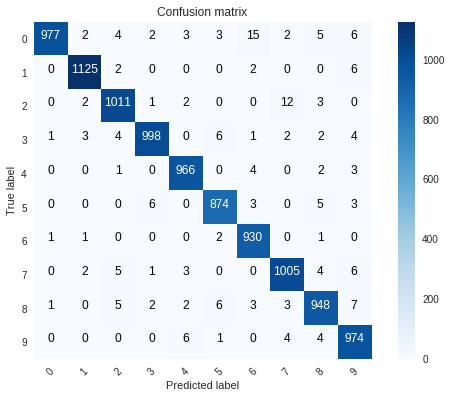

In [0]:
conf_matrix = confusion_matrix(test_predictions, y_test)
_ = plot_confusion_matrix(conf_matrix, classes=[str(i) for i in range(10)])

In [0]:
normalized_acc(conf_matrix)

Acc class 0 -->  0.959
Acc class 1 -->  0.991
Acc class 2 -->  0.981
Acc class 3 -->  0.977
Acc class 4 -->  0.99
Acc class 5 -->  0.981
Acc class 6 -->  0.995
Acc class 7 -->  0.98
Acc class 8 -->  0.97
Acc class 9 -->  0.985
